# Laboratorio 1: Exploración y Visualización de Datos

Integrantes: Adolfo Rojas \(sección 2\) \- Emilia Chávez S \(sección 1\)


## Pongamonos en situación

Eres un **cientifico de datos** que trabaja en **Netflix**.

En los últimos años ha **crecido la cantidad usuarios que ven anime** en la plataforma, por lo que el equipo de contenido de Netflix ha decidido invertir en la producción de series de anime.

Tu jefe te ha pedido que **realices un análisis de los datos de las series de anime** para entender mejor el mercado y poder tomar decisiones informadas.

## Datos

Para realizar esta tarea, te han entregado un dataset con información de animes de la página **MyAnimeList** (MAL).

FUENTE: https://www.kaggle.com/datasets/azathoth42/myanimelist

Tenemos 2 archivos:
- `anime.csv`: Contiene 6 atributos: "title", "type", "source", "episodes", "airing" y "studio", que corresponden a información sobre el anime.
- `anime-stats.csv`: Contiene 4 atributos: "title", "score", "members" (número de usuarios que tienen el anime en su lista) y "favorites", que corresponden a estadísticas sobre la popularidad de cada anime.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(palette="mako")

Para que la siguiente celda funcione, los archivos CSV deben estar en la misma carpeta que este notebook.

In [4]:
df_anime = pd.read_csv('anime.csv', encoding="UTF-8")
df_stats = pd.read_csv('anime-stats.csv', encoding="UTF-8")

También puedes cargarlos remotamente de un repositorio usando el link a los archivos:


In [5]:
#df_anime = pd.read_csv('https://raw.githubusercontent.com/bacchus00/cositas/main/anime.csv', encoding="UTF-8")
#df_stats = pd.read_csv('https://raw.githubusercontent.com/bacchus00/cositas/main/anime-stats.csv', encoding="UTF-8")

Cualquiera de estas 2 formas es válida para cargar los datos.

## Exploración básica


Para hacernos una idea de como se ven los datos, lo más usual es mostrar los primeros registros de cada dataset.

1. Muestre los primeros 5 registros de cada dataset.

In [6]:
df_anime.head(5)

,title,type,source,episodes,airing,studio
0,Inu x Boku SS,TV,Manga,12,False,David Production
1,Seto no Hanayome,TV,Manga,26,False,Gonzo
2,Shugo Chara!! Doki,TV,Manga,51,False,Satelight
3,Princess Tutu,TV,Original,38,False,Hal Film Maker
4,Bakuman. 3rd Season,TV,Manga,25,False,J.C.Staff


In [7]:
df_stats.head()

,title,score,members,favorites
0,Inu x Boku SS,7.63,283882,2809
1,Seto no Hanayome,7.89,204003,2579
2,Shugo Chara!! Doki,7.55,70127,802
3,Princess Tutu,8.21,93312,3344
4,Bakuman. 3rd Season,8.67,182765,2082


Siempre es útil conocer **cuántos datos y cuántas columnas** tenemos.

Esto es importante para poder responder
- ¿Tenemos suficientes datos?
- ¿Tenemos suficientes columnas?
- ¿Será muy caro computacionalmente trabajar con estos datos?

2. ¿Cuales son las dimensiones de cada dataset? en otras palabras, ¿cuántas filas y columnas tiene cada uno?

In [8]:
df_anime.shape

(14478, 6)

In [9]:
df_stats.shape

(14478, 4)

3. Además de ver algunos registros y las dimensiones, también es útil conocer algunas **estadísticas básicas** de los datos. Usa una función que nos permita **ver las estadísticas básicas** de **todas las columnas**.

In [10]:
df_anime.describe(include="all")

,title,type,source,episodes,airing,studio
count,14478,14478,14478,14478.000000,14478,8544
unique,14477,7,16,NaN,2,456
top,Hinamatsuri,TV,Unknown,NaN,False,Toei Animation
freq,2,4271,4210,NaN,14127,735
mean,NaN,NaN,NaN,11.308399,NaN,NaN
std,NaN,NaN,NaN,43.443451,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,NaN
50%,NaN,NaN,NaN,1.000000,NaN,NaN
75%,NaN,NaN,NaN,12.000000,NaN,NaN


In [11]:
df_stats.describe(include="all")

,title,score,members,favorites
count,14478,14478.000000,1.447800e+04,14478.000000
unique,14477,NaN,NaN,NaN
top,Hinamatsuri,NaN,NaN,NaN
freq,2,NaN,NaN,NaN
mean,NaN,6.142482,2.296640e+04,311.649606
std,NaN,1.463981,7.498136e+04,2615.554211
min,NaN,0.000000,0.000000e+00,0.000000
25%,NaN,5.550000,2.450000e+02,0.000000
50%,NaN,6.370000,1.679500e+03,2.000000
75%,NaN,7.060000,1.037900e+04,23.000000


## Posibles errores en los datos

Al construir los datasets, es posible que se hayan generado **datos duplicados**, ya sea porque alguien ingresó dos veces la misma información, o porque se generó un error en la recolección de datos. Es importante **detectar y decidir qué hacer con estos datos**.

4.  ¿Existen filas duplicadas en alguno de los dataframes?


In [12]:
any(df_anime.duplicated())

False

In [13]:
any(df_stats.duplicated())

False

No hay duplicados en ninguno de los dos dataframes.



Otro caso común es que existan **valores nulos** en los datos. Al igual que antes, es importante **identificarlos y decidir qué hacer con ellos**.

5.  ¿Hay filas con valores nulos en los dataframes?

In [14]:
df_anime.isna().sum()

title          0
type           0
source         0
episodes       0
airing         0
studio      5934
dtype: int64

In [15]:
df_stats.isna().sum()

title        0
score        0
members      0
favorites    0
dtype: int64

No hay valores nulos en ninguno de los dos dataframes.


Consideremos que estamos en la situación en la que **decidimos eliminar los valores nulos**.



6. En caso de existir valores nulos, elimine las filas que los contengan. ¿Cuántas filas quedan en cada dataset luego de eliminar los valores nulos?

In [16]:
df_anime.dropna()

,title,type,source,episodes,airing,studio
0,Inu x Boku SS,TV,Manga,12,False,David Production
1,Seto no Hanayome,TV,Manga,26,False,Gonzo
2,Shugo Chara!! Doki,TV,Manga,51,False,Satelight
3,Princess Tutu,TV,Original,38,False,Hal Film Maker
4,Bakuman. 3rd Season,TV,Manga,25,False,J.C.Staff
...,...,...,...,...,...,...
14461,Tobidashi wa Abunaizo! Mushi Mushi Mura no Kou...,OVA,Unknown,1,False,Toei Animation
14464,Mr. Men Little Miss,ONA,Picture book,0,True,Sanrio
14469,Ichinen Ikkumi,OVA,Unknown,1,False,Toei Animation
14470,Mushi Mushi Mura no Nakama-tachi: Minna Ii Tok...,OVA,Original,1,False,Toei Animation


In [17]:
print(len(df_stats), len(df_stats.dropna()))

14478 14478


In [18]:
df_stats.dropna()

,title,score,members,favorites
0,Inu x Boku SS,7.63,283882,2809
1,Seto no Hanayome,7.89,204003,2579
2,Shugo Chara!! Doki,7.55,70127,802
3,Princess Tutu,8.21,93312,3344
4,Bakuman. 3rd Season,8.67,182765,2082
...,...,...,...,...
14473,Gutchonpa Omoshiro Hanashi,5.50,76,0
14474,Geba Geba Shou Time!,4.60,90,0
14475,Godzilla: Hoshi wo Kuu Mono,0.00,1741,0
14476,Nippon Mukashibanashi: Sannen Netarou,6.00,32,0


In [19]:
print(len(df_stats), len(df_stats.dropna()))

14478 14478


## Juntemos nuestros datos

Con el objetivo de tener toda la información en un solo dataframe, y así poder responder preguntas más complejas, **unamos ambos dataframes**.

7. Junte ambos dataframes en uno solo **a través de la columna "title"** con un **inner join**, y **muestre los primeros 5 registros** de este nuevo dataframe.

In [20]:
df_mal = df_anime.merge(df_stats, on="title", how="inner")
df_mal.head(5)

,title,type,source,episodes,airing,studio,score,members,favorites
0,Inu x Boku SS,TV,Manga,12,False,David Production,7.63,283882,2809
1,Seto no Hanayome,TV,Manga,26,False,Gonzo,7.89,204003,2579
2,Shugo Chara!! Doki,TV,Manga,51,False,Satelight,7.55,70127,802
3,Princess Tutu,TV,Original,38,False,Hal Film Maker,8.21,93312,3344
4,Bakuman. 3rd Season,TV,Manga,25,False,J.C.Staff,8.67,182765,2082


## Obtengamos información de los datos

Ahora tenemos que entender un poco más sobre los datos que tenemos, para que el equipo de contenido pueda tomar decisiones informadas.

Para esto, tu jefe te ha solicitado las siguientes tareas:

8. "Necesitamos saber cuales son los animes más populares." Para esto, **entrega los 5 animes con más miembros** (número de usuarios que tienen el anime en su lista).



In [21]:
df_mal.sort_values(by="members", ascending=False).head(5)
# df_mal["type"].value_counts()
# df_mal["source"].unique()

,title,type,source,episodes,airing,studio,score,members,favorites
7916,Death Note,TV,Manga,37,False,Madhouse,8.67,1456378,88696
8126,Shingeki no Kyojin,TV,Manga,25,False,Wit Studio,8.49,1345842,64032
6299,Sword Art Online,TV,Light novel,25,False,A-1 Pictures,7.64,1301616,50042
2555,Fullmetal Alchemist: Brotherhood,TV,Manga,64,False,Bones,9.25,1199091,106895
8866,One Punch Man,TV,Web manga,12,False,Madhouse,8.73,1020754,30747


9. Esta información puede ser muy valiosa para identificar alguna característica en común de los animes más populares. **Realiza una observación de alguna característica en común, o algo relevante, de los 5 animes** obtenidos en la pregunta anterior.



R: Notar que todos los animes más enlistados fueron animes televisados que ya no se encuentran en emisión y además no originales


10. Además de un anime popular, el equipo te dice que quiere hacer un anime de mucha calidad, osea, que sea muy bien evaluado, en particular buscan que tenga un score mayor a 9.0. **Entrega los con score mayor a 9.0**.

In [22]:
df_mal[df_mal["score"] >= 9].sort_values(by="members", ascending=False)

,title,type,source,episodes,airing,studio,score,members,favorites
2555,Fullmetal Alchemist: Brotherhood,TV,Manga,64,False,Bones,9.25,1199091,106895
3002,Steins;Gate,TV,Visual novel,24,False,White Fox,9.14,1010330,92423
1028,Kimi no Na wa.,Movie,Original,1,False,CoMix Wave Films,9.19,730076,34912
418,Hunter x Hunter (2011),TV,Manga,148,False,Madhouse,9.11,720920,64375
2783,Clannad: After Story,TV,Visual novel,24,False,Kyoto Animation,9.01,607387,47380
6575,Koe no Katachi,Movie,Manga,1,False,Kyoto Animation,9.04,511915,19815
6556,Gintama,TV,Manga,201,False,Sunrise,9.01,459031,33781
6180,Steins;Gate 0,TV,Visual novel,23,True,White Fox,9.15,223989,1882
8995,Gintama&#039;,TV,Manga,51,False,Sunrise,9.11,215527,4549
1252,Gintama°,TV,Manga,51,False,Bandai Namco Pictures,9.15,198744,5668


11. Ahora tu equipo desea analizar a la competencia. Para esto **entrega los 5 estudios de anime con mejor score promedio entre sus animes**.



In [23]:
df_mal[["studio", "score"]].groupby("studio").agg("mean").sort_values(by="score", ascending=False).head(5)

,score
studio,
Odolttogi,7.870000
B&amp;T,7.820000
Fuji TV,7.730000
Studio Rikka,7.688571
D &amp; D Pictures,7.635000


12. Después de que te preguntaran por los animes que tienen mejor score, se te ocurre crear una columna que indique cuales animes son "buenos". Para esto, el área de producto te indica que un "mal" anime tiene score bajo 4.0, uno "intermedio" tiene score entre 4.0 y 8.0, y uno "bueno" tiene score sobre 8.0. **Usa el método apply para crear una nueva columna "quality" que tenga como valor "Malo", "Intermedio" o "Bueno" según la definición anterior. Luego, muestra los 5 primeros registros**

In [24]:
def clasificador(score):
    if score < 4:
        return "Malo"
    elif score < 8:
        return "Intermedio"
    else:
        return "Bueno"
df_mal["quality"] = df_mal["score"].apply(clasificador)
df_mal.head(5)

,title,type,source,episodes,airing,studio,score,members,favorites,quality
0,Inu x Boku SS,TV,Manga,12,False,David Production,7.63,283882,2809,Intermedio
1,Seto no Hanayome,TV,Manga,26,False,Gonzo,7.89,204003,2579,Intermedio
2,Shugo Chara!! Doki,TV,Manga,51,False,Satelight,7.55,70127,802,Intermedio
3,Princess Tutu,TV,Original,38,False,Hal Film Maker,8.21,93312,3344,Bueno
4,Bakuman. 3rd Season,TV,Manga,25,False,J.C.Staff,8.67,182765,2082,Bueno


13. Rodrigo, un miembro del equipo, te dice: "Si deseamos que la gente nos tenga en sus favoritos, ¿qué tipo de anime deberíamos hacer? Para cada tipo de anime (TV, OVA, Movie, etc) podríamos sumar la cantidad de favoritos, y hacer el tipo de anime que tenga la suma más grande". Sin embargo, tú te percatas de que **hay un problema con lo que él propone**. ¿Cuál es este problema?

R: La cantidad de tuplas por cada tipo no los hace comparables, al menos no con la   
función propuesta sin previamente normalizar los datos puesto que de esta forma terminaríamos favoreciendo a los de tipo más abundante


14. Para mostrarle a Rodrigo el problema con la solución que él propuso, **entrega la cantidad de animes por cada tipo**.

In [25]:
df_mal["type"].value_counts()

type
TV         4272
OVA        3613
Movie      2624
Special    1948
ONA        1144
Music       849
Unknown      30
Name: count, dtype: int64

15. Tu jefe te dice que tuvo una visión en un sueño, te dice que sabe como hacer el anime más famoso. Quiere hacer un anime de tipo OVA, donde la fuente (columna source) sea Novel. **Entrega las columnas title, members, favorites, y quality de todos los animes que cumplan con estas características**.

In [26]:
df_mal_novel = df_mal.loc[(df_mal["source"] == "Novel") & (df_mal["type"] == "OVA"), 
           ["title", "members", "favorites", "quality"]]

df_mal_novel

,title,members,favorites,quality
641,Mobile Suit Gundam Unicorn,52688,1066,Bueno
923,H. P. Lovecraft&#039;s The Dunwich Horror and ...,2099,4,Intermedio
1390,Ginga Eiyuu Densetsu Gaiden (1999),10381,15,Bueno
1599,Tamagawa Kyoudai,28,0,Intermedio
2109,Vatican Kiseki Chousakan OVA,2883,2,Intermedio
2552,X Densha de Ikou,1549,8,Intermedio
3067,The Hakkenden,4982,10,Intermedio
3907,Lesson XX,5424,4,Intermedio
4162,Kubikiri Cycle: Aoiro Savant to Zaregototsukai,44763,290,Intermedio
4509,Boku no Sexual Harassment,11912,45,Intermedio


16. Para verificar si tu jefe tiene sueños extraños, o si realmente tiene una visión, **calcula y muestra el promedio de los miembros, el promedio de los favoritos, y la categoría de quality más repetida** de los animes obtenidos en la pregunta anterior.

In [27]:
mean_miembros = df_mal_novel["members"].mean()
mean_favoritos = df_mal_novel["favorites"].mean()
mode_categoria = df_mal_novel["quality"].mode()[0]

print(f"Promedio de los miembros: {mean_miembros:.2f}")
print(f"Promedio de los favoritos: {mean_favoritos:.2f}")
print(f"Categoría más repetida: {mode_categoria}")

Promedio de los miembros: 15462.39
Promedio de los favoritos: 249.84
Categoría más repetida: Intermedio


# Visualicemos los datos

17. Muestre el histograma de todas las puntuaciones de animes

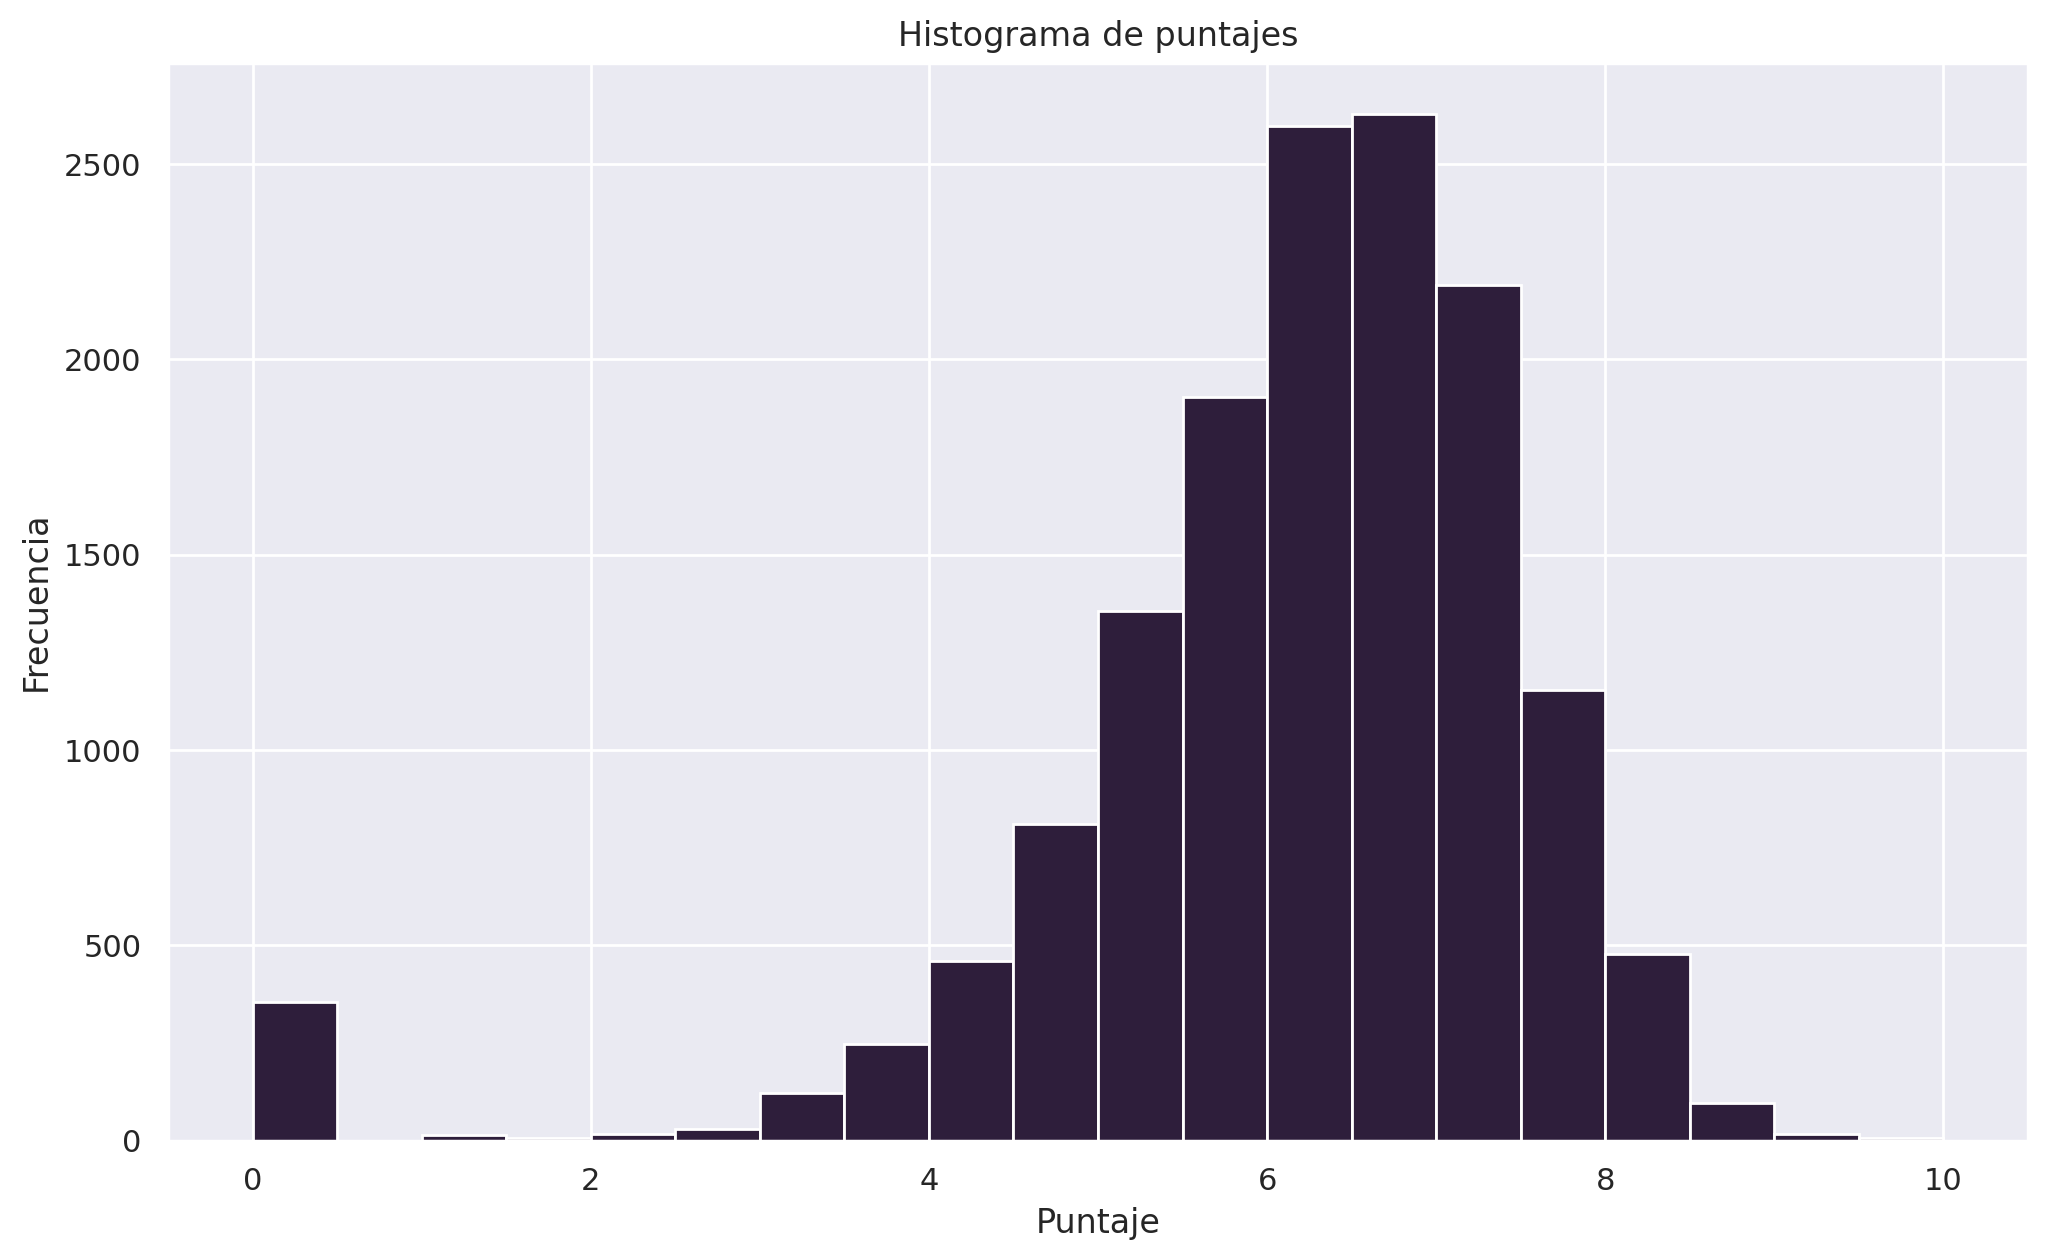

In [28]:
df_mal["score"].plot.hist(bins=20)
# plt.hist(df_mal["score"], bins=20)
# sns.histplot(df_mal["score"], bins=20)

plt.xlabel("Puntaje")
plt.ylabel("Frecuencia")
plt.title("Histograma de puntajes")
plt.show()

18. Muestre la densidad de puntajes para los principales tipos de anime (TV, OVA, Movie)

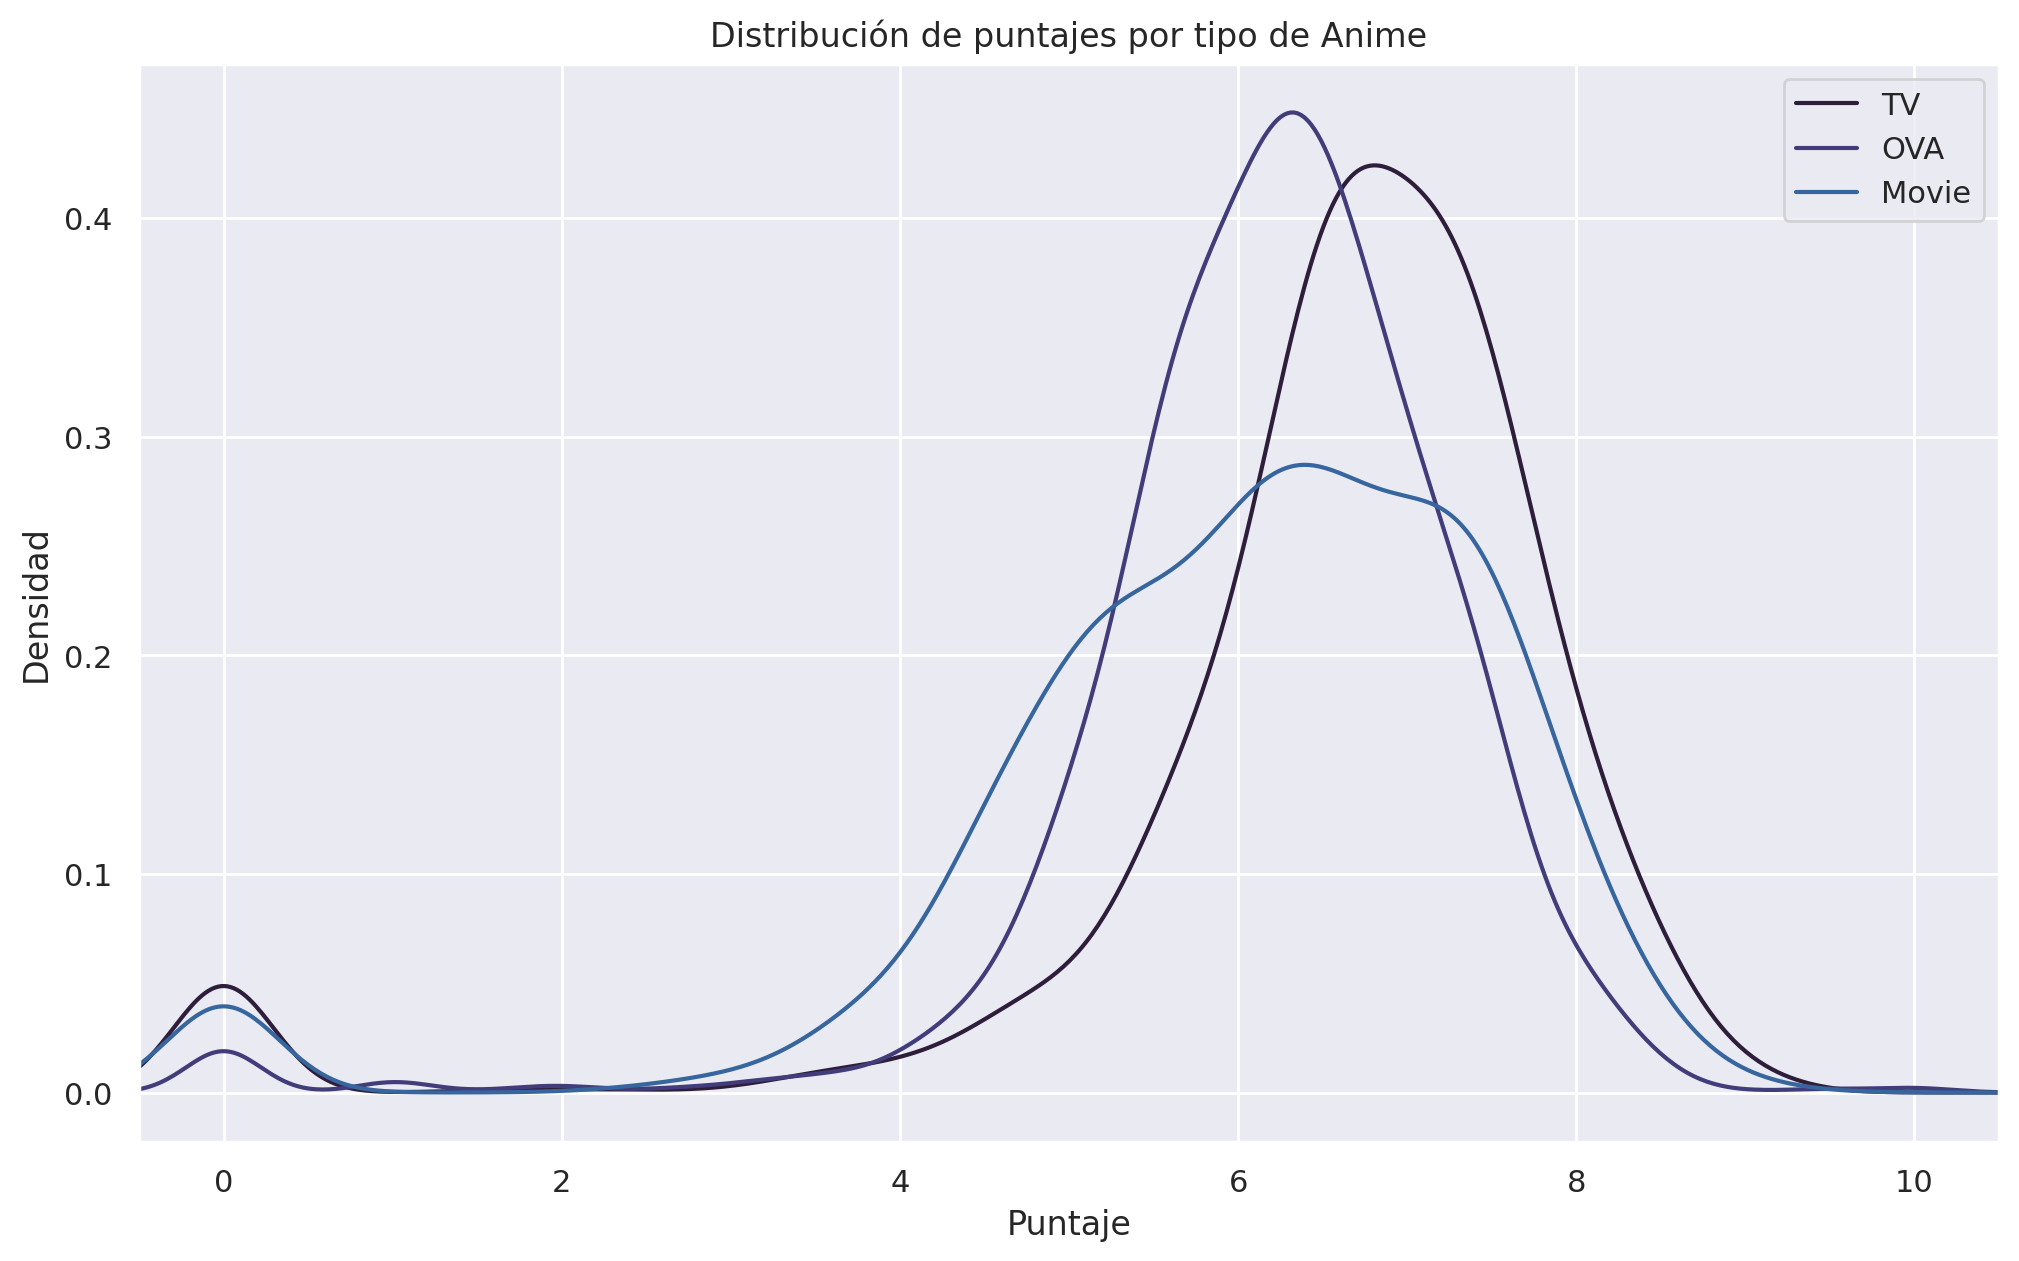

In [29]:
types = ["TV", "OVA", "Movie"]

for type in types:
    puntajes = df_mal[df_mal["type"] == type]["score"]
    puntajes.plot.density(xlim=[-0.5, 10.5], label=type)
#     sns.kdeplot(puntajes, fill=True, label=type)
    
plt.xlabel("Puntaje")
plt.ylabel("Densidad")
plt.title("Distribución de puntajes por tipo de Anime")
plt.legend()
plt.show()

19. ¿Cuál tipo de anime es más exitoso? ¿Se está tomando en cuenta la cantidad de animes por tipo al afirmar eso?

R: En cuanto a favoritismo el anime de TV es el líder, lo cual tiene sentido ya que cuenta con más títulos, pues como habíamos mencionado previamente, los datos no están normalizados y el gráfico no corrige este desbalance de muestras.

